# Data-Led Executive Briefing

---
## 1 Front Matter  



#### Title: The influence of COVID-19 on Airbnb in Greater London  
#### Student id: 19105457  
#### Module number: CASA0013   
#### Module name: Introduction to Programming for Spatial Analysts  
#### Word count: 1535


---

## 2 Executive Summary

As one of the most popular P2P accommodation services, Airbnb has plenty of housing all over the world. However, the breakout of COVID-19 at the beginning of 2020, severely hit the tourism industry. Simultaneously, it affected the Airbnb business to some degree. Guests canceled their rental housing reservations in some big cities due to the COVID-19 (Dolnicar and Zare, 2020). This report is aimed to find the effects of COVID-19 on Airbnb in Greater London where is a golden area for the Airbnb industry. We explored the influence of COVID-19 on Airbnb from two aspects, which is the variation of the number and the price of rooms in Greater London. The results demonstrate that although both the number of rooms and the room price decreased in most boroughs, the extent of decline has not been significant. Even more, the number and the price of rooms have increased slightly in a boroughs.

---

## 3 Reproducible Analysis

### 3.1 Number of different types of Airbnb rooms in 2019 and 2020

In [3]:
from PIL import Image
from IPython.display import Image as IMG
path1 = 'Figure1.png' 
path2 = 'Figure2.png' 
path3 = 'Figure3.png' 
path4 = 'Figure4.png' 
path5 = 'Figure5.png' 


listing_2019_12_09_url = 'https://github.com/VON-N1NE/i2p/raw/main/Data/listing_2019_12_09.csv'
listing_2020_11_06_url = 'https://github.com/VON-N1NE/i2p/raw/main/Data/listing_2020_11_06.csv'

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df_2019 = pd.read_csv(listing_2019_12_09_url, low_memory=False)
df_2020 = pd.read_csv(listing_2020_11_06_url, low_memory=False)

print(f"Data frame of df_2019 is {df_2019.shape[0]:,} x {df_2019.shape[1]}")
print(f"Data frame of df_2020 is {df_2020.shape[0]:,} x {df_2020.shape[1]}")


df_2019[df_2019.id.isna()][['id','name','host_id','host_name']]
df_2019.drop(df_2019[df_2019.id.isna()].index.values, axis=0, inplace=True)


df_2019.isnull().sum(axis=1).sort_values(ascending=False)

probs_2019 = df_2019.isnull().sum(axis=1)
# print(type(probs))       
# probs_2019.plot.hist(bins=30)

df_2019.drop(probs_2019[probs_2019 > 3.0].index, inplace=True)


print(f"df_2019 have reduced data frame to: {df_2019.shape[0]} rows and {df_2019.shape[1]} columns")

df_2020[df_2020.id.isna()][['id','name','host_id','host_name']]
df_2020.drop(df_2020[df_2020.id.isna()].index.values, axis=0, inplace=True)
df_2020.isnull().sum(axis=1).sort_values(ascending=False)

probs_2020 = df_2020.isnull().sum(axis=1)
# print(type(probs))       
# probs_2020.plot.hist(bins=30)

df_2020.drop(probs_2020[probs_2020 > 3.0].index, inplace=True)

print(f"df_2020 have reduced data frame to: {df_2020.shape[0]} rows and {df_2020.shape[1]} columns")

Data frame of df_2019 is 86,469 x 16
Data frame of df_2020 is 76,984 x 16
df_2019 have reduced data frame to: 85959 rows and 16 columns
df_2020 have reduced data frame to: 76960 rows and 16 columns


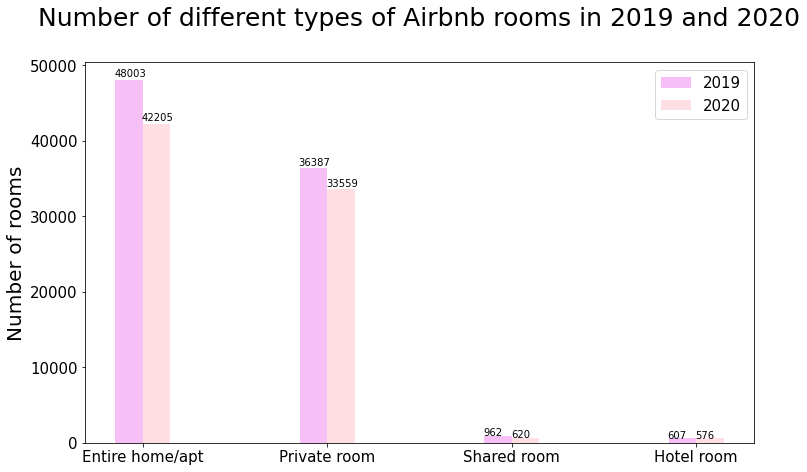

In [2]:
room_type = ['room_type']
room_type_number_2019 = df_2019[room_type[0]].value_counts()
room_type_number_2020 = df_2020[room_type[0]].value_counts()

# print(room_type_number_2019)
# print('\n')
# print(room_type_number_2020)


room_type_number_2019_temp = []
for i in room_type_number_2019:              
    room_type_number_2019_temp.append( i )

room_type_number_2020_temp = []
for i in room_type_number_2020:              
    room_type_number_2020_temp.append( i )


year = ['2019', '2020']
room_type_name = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'] 

x = np.arange(4)
room_number_of_Entire_home_and_Private_room_2019 = room_type_number_2019_temp
room_number_of_Entire_home_and_Private_room_2020 = room_type_number_2020_temp
plt.figure(figsize=(12,7))
bar_width = 0.15

tick_label = room_type_name

a = plt.bar(x, room_number_of_Entire_home_and_Private_room_2019, bar_width, align="center", color="violet", label="2019", alpha=0.5)
b = plt.bar(x+bar_width, room_number_of_Entire_home_and_Private_room_2020, bar_width, color="pink", align="center", label="2020", alpha=0.5)
plt.tick_params(labelsize=15)
plt.title('Number of different types of Airbnb rooms in 2019 and 2020', fontsize=25,y=1.08)
plt.ylabel("Number of rooms", fontsize=20)

def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2-0.08, 1.01*height, '%s' % int(height))

plt.xticks(x+bar_width/2, tick_label)
autolabel(a)
autolabel(b)
plt.legend(fontsize=15)

plt.savefig('Figure1.png')
plt.show()

### 3.2 The variation rates of the number of Airbnb rooms in Greater London from 2019 to 2020

neighbourhood: Borough names
Price_x: Number of rooms in 2019
Price_y: Number of rooms in 2020
diff: Variation rate (%)

             neighbourhood  count_x  count_y       diff
0     Barking and Dagenham      377      405   7.427056
1                   Barnet     1672     1643  -1.734450
2                   Bexley      243      273  12.345679
3                    Brent     2594     2336  -9.946029
4                  Bromley      667      577 -13.493253
5                   Camden     6097     5257 -13.777268
6           City of London      455      449  -1.318681
7                  Croydon     1097     1110   1.185050
8                   Ealing     1802     1673  -7.158713
9                  Enfield      687      686  -0.145560
10               Greenwich     1682     1585  -5.766944
11                 Hackney     6324     5720  -9.550917
12  Hammersmith and Fulham     4204     3577 -14.914367
13                Haringey     2235     2119  -5.190157
14                  Harrow      481    

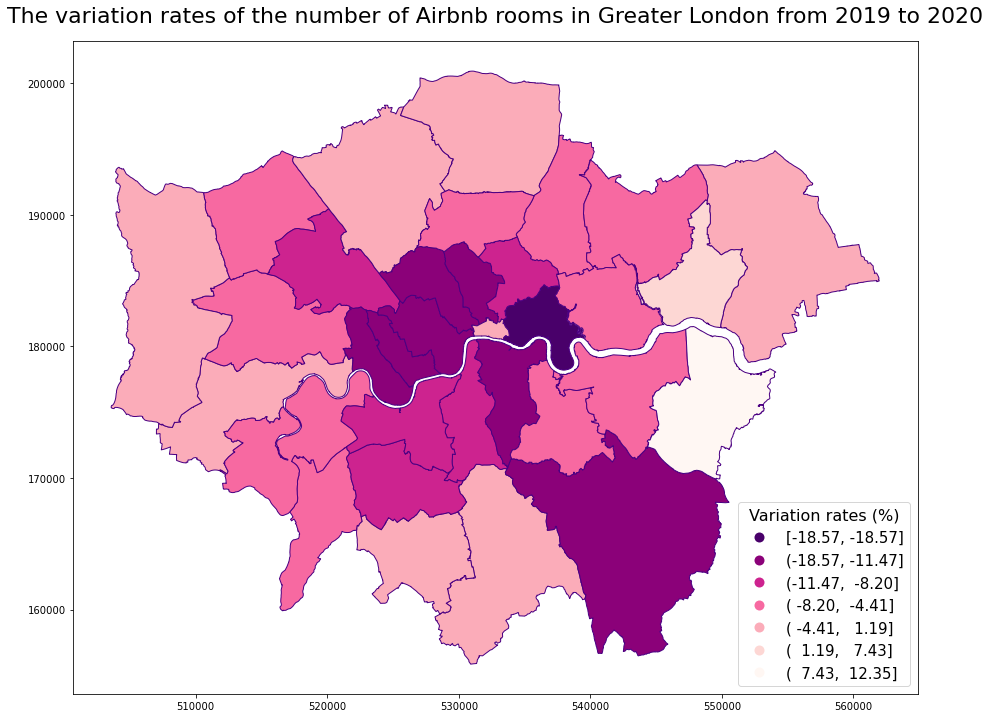

In [23]:
neighbourhood_data_2019 = df_2019.groupby(['neighbourhood'])
neighbourhood_data_2020 = df_2020.groupby(['neighbourhood'])

neighbourhood_count_data_2019 = neighbourhood_data_2019.neighbourhood.count().reset_index(name="count")
neighbourhood_count_data_2020 = neighbourhood_data_2020.neighbourhood.count().reset_index(name="count")


diff_2019_to_2020 = pd.merge(neighbourhood_count_data_2019, neighbourhood_count_data_2020, how = 'left', on='neighbourhood')
diff_2019_to_2020['diff'] = (diff_2019_to_2020['count_y'] - diff_2019_to_2020['count_x'])/ diff_2019_to_2020['count_x'] * 100

print('neighbourhood: Borough names\nPrice_x: Number of rooms in 2019\nPrice_y: Number of rooms in 2020\ndiff: Variation rate (%)\n')
print(diff_2019_to_2020)

London_map = gpd.read_file('https://github.com/VON-N1NE/i2p/raw/main/Data/Boroughs.gpkg')

join_data_neighbourhood = London_map.set_index('NAME').join(diff_2019_to_2020.set_index('neighbourhood'))
join_data_neighbourhood.head()


fig, ax = plt.subplots(1, figsize=(16, 12),facecolor='white')

ax.axis('on')
ax.set_title('The variation rates of the number of Airbnb rooms in Greater London from 2019 to 2020', fontsize = 22,  y = 1.02)

ax = join_data_neighbourhood.plot(column='diff', ax=ax, legend=True, cmap='RdPu_r', edgecolor='indigo', 
                                  legend_kwds={'loc': 'lower right' ,'fontsize':15}, scheme='NaturalBreaks', k=7)

legend = ax.get_legend()
legend.set_title('Variation rates (%)')
legend.get_title().set_fontsize('16')

plt.savefig('Figure2.png', dpi=100)
plt.show()

### 3.3 The price of 3 different types of Airbnb rooms from 2016 to 2020

In [4]:
listing_2018_12_07_url = 'https://github.com/VON-N1NE/i2p/raw/main/Data/listing_2018_12_07.csv'
listing_2017_03_04_url = 'https://github.com/VON-N1NE/i2p/raw/main/Data/listing_2017_03_04.csv'
listing_2016_10_03_url = 'https://github.com/VON-N1NE/i2p/raw/main/Data/listing_2016_10_03.csv'

df_2018 = pd.read_csv(listing_2018_12_07_url, low_memory=False)
df_2017 = pd.read_csv(listing_2017_03_04_url, low_memory=False)
df_2016 = pd.read_csv(listing_2016_10_03_url, low_memory=False)

print(f"Data frame of df_2018 is {df_2018.shape[0]:,} x {df_2018.shape[1]}")
print(f"Data frame of df_2017 is {df_2017.shape[0]:,} x {df_2017.shape[1]}")
print(f"Data frame of df_2016 is {df_2016.shape[0]:,} x {df_2016.shape[1]}")

df_2018[df_2018.id.isna()][['id','name','host_id','host_name']]
df_2018.drop(df_2018[df_2018.id.isna()].index.values, axis=0, inplace=True)
df_2018.isnull().sum(axis=1).sort_values(ascending=False)

probs_2018 = df_2018.isnull().sum(axis=1)
# print(type(probs))       
#probs_2018.plot.hist(bins=30)

df_2018.drop(probs_2018[probs_2018 > 3.0].index, inplace=True)
print(f"df_2018 have reduced data frame to: {df_2018.shape[0]} rows and {df_2018.shape[1]} columns")


df_2017[df_2017.id.isna()][['id','name','host_id','host_name']]
df_2017.drop(df_2017[df_2017.id.isna()].index.values, axis=0, inplace=True)
df_2017.isnull().sum(axis=1).sort_values(ascending=False)

probs_2017 = df_2017.isnull().sum(axis=1)
# print(type(probs))       
# probs_2017.plot.hist(bins=30)

df_2017.drop(probs_2017[probs_2017 > 3.0].index, inplace=True)
print(f"df_2017 have reduced data frame to: {df_2017.shape[0]} rows and {df_2017.shape[1]} columns")



df_2016[df_2016.id.isna()][['id','name','host_id','host_name']]
df_2016.drop(df_2016[df_2016.id.isna()].index.values, axis=0, inplace=True)
df_2016.isnull().sum(axis=1).sort_values(ascending=False)

probs_2016 = df_2016.isnull().sum(axis=1)
# print(type(probs))       
# probs_2016.plot.hist(bins=30)

df_2016.drop(probs_2016[probs_2016 > 3.0].index, inplace=True)
print(f"df_2016 have reduced data frame to: {df_2016.shape[0]} rows and {df_2016.shape[1]} columns")


Data frame of df_2018 is 77,096 x 16
Data frame of df_2017 is 53,904 x 16
Data frame of df_2016 is 49,348 x 16
df_2018 have reduced data frame to: 77070 rows and 16 columns
df_2017 have reduced data frame to: 53895 rows and 16 columns
df_2016 have reduced data frame to: 49339 rows and 16 columns


In [5]:
room_type_2016 = df_2016.groupby(['room_type'])
room_type_2017 = df_2017.groupby(['room_type'])
room_type_2018 = df_2018.groupby(['room_type'])
room_type_2019 = df_2019.groupby(['room_type'])
room_type_2020 = df_2020.groupby(['room_type'])


room_type_2016_price = room_type_2016.price.mean()
room_type_2017_price = room_type_2017.price.mean()
room_type_2018_price = room_type_2018.price.mean()
room_type_2019_price = room_type_2019.price.mean()
room_type_2020_price = room_type_2020.price.mean()

# print(room_type_2016_price)
# print(room_type_2017_price)
# print(room_type_2018_price)
# print(room_type_2019_price)
# print(room_type_2020_price)


room_type_2016_price_list_temp = []
room_type_2017_price_list_temp = []
room_type_2018_price_list_temp = []
room_type_2019_price_list_temp = []
room_type_2020_price_list_temp = []


for i in room_type_2016_price:              
    room_type_2016_price_list_temp.append( i )
for i in room_type_2017_price:              
    room_type_2017_price_list_temp.append( i )
for i in room_type_2018_price:              
    room_type_2018_price_list_temp.append( i )
for i in room_type_2019_price:              
    room_type_2019_price_list_temp.append( i )
for i in room_type_2020_price:              
    room_type_2020_price_list_temp.append( i )

    
room_type_2016_price_list = [float('{:.2f}'.format(i)) for i in room_type_2016_price_list_temp]
room_type_2017_price_list = [float('{:.2f}'.format(i)) for i in room_type_2017_price_list_temp]
room_type_2018_price_list = [float('{:.2f}'.format(i)) for i in room_type_2018_price_list_temp]    
room_type_2019_price_list = [float('{:.2f}'.format(i)) for i in room_type_2019_price_list_temp]
room_type_2020_price_list = [float('{:.2f}'.format(i)) for i in room_type_2020_price_list_temp]

del room_type_2019_price_list[1] # The data of hotel room do not exist in the data from 2016 to 2018, so we do not use them and delete them.
del room_type_2020_price_list[1]

# print('\n',room_type_2016_price_list)
# print('\n',room_type_2017_price_list)
# print('\n',room_type_2018_price_list)
# print('\n',room_type_2019_price_list)
# print('\n',room_type_2020_price_list)

In [6]:
room_type_name_2 = ['Entire home/apt', 'Private room', 'Shared room'] 
room_type_price_total= []

for i in room_type_2016_price_list:
  room_type_price_total.append(i)
for i in room_type_2017_price_list:
  room_type_price_total.append(i)
for i in room_type_2018_price_list:
  room_type_price_total.append(i)
for i in room_type_2019_price_list:
  room_type_price_total.append(i)
for i in room_type_2020_price_list:
  room_type_price_total.append(i)
# print(room_type_price_total)


Entire_home_apt_price_changing_list = []
Private_room_price_changing_list = []
Shared_room_changing_list = []

for i in range(0,len(room_type_price_total),3):
    Entire_home_apt_price_changing_list.append(room_type_price_total[i])
# print(Entire_home_apt_price_changing_list)

room_type_price_total_temp = room_type_price_total.pop(0)
room_type_price_total.append(room_type_price_total_temp)

for i in range(0,len(room_type_price_total),3):
    Private_room_price_changing_list.append(room_type_price_total[i])
# print(Private_room_price_changing_list)

room_type_price_total_temp = room_type_price_total.pop(0)
room_type_price_total.append(room_type_price_total_temp)

for i in range(0,len(room_type_price_total),3):
    Shared_room_changing_list.append(room_type_price_total[i])
# print(Shared_room_changing_list)

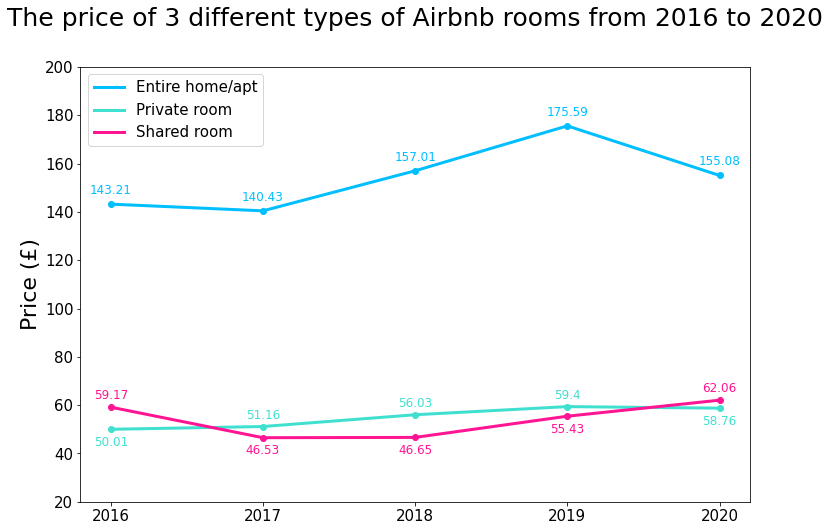

In [7]:
year = ['2016','2017','2018','2019', '2020']


plt.figure(figsize = (12, 8))

plt.plot(year, Entire_home_apt_price_changing_list, 'r', linewidth = 3, color ='deepskyblue', label = room_type_name_2[0])
plt.plot(year, Private_room_price_changing_list,'r', linewidth = 3,color ='turquoise' ,label= room_type_name_2[1])
plt.plot(year, Shared_room_changing_list, 'r', color ='deeppink', linewidth = 3,label= room_type_name_2[2])

plt.plot(year, Entire_home_apt_price_changing_list, 'or',markersize = 6, color ='deepskyblue')
plt.plot(year, Private_room_price_changing_list, 'or',markersize = 6, color ='turquoise')
plt.plot(year, Shared_room_changing_list, 'or',markersize = 6, color ='deeppink')

plt.tick_params(labelsize=15)
plt.ylabel("Price (£)", fontsize=22) 
plt.title("The price of 3 different types of Airbnb rooms from 2016 to 2020", fontsize=25, y=1.08)
plt.xticks(rotation=360, fontsize=15)
plt.ylim(20, 200)

for a, b in zip(year, Entire_home_apt_price_changing_list):
    plt.text(a, b+3, b, ha='center', va='bottom', fontsize=12,color ='deepskyblue')

plt.text(year[0], Shared_room_changing_list[0]+2, Shared_room_changing_list[0], ha='center', va='bottom', fontsize=12, color = 'deeppink')
plt.text(year[1], Shared_room_changing_list[1]-8, Shared_room_changing_list[1], ha='center', va='bottom', fontsize=12, color = 'deeppink')
plt.text(year[2], Shared_room_changing_list[2]-8, Shared_room_changing_list[2], ha='center', va='bottom', fontsize=12, color = 'deeppink')
plt.text(year[3], Shared_room_changing_list[3]-8, Shared_room_changing_list[3], ha='center', va='bottom', fontsize=12, color = 'deeppink')
plt.text(year[4], Shared_room_changing_list[4]+2, Shared_room_changing_list[4], ha='center', va='bottom', fontsize=12, color = 'deeppink')

plt.text(year[0], Private_room_price_changing_list[0]-8, Private_room_price_changing_list[0], ha='center', va='bottom', fontsize=12, color ='turquoise')
plt.text(year[1], Private_room_price_changing_list[1]+2, Private_room_price_changing_list[1], ha='center', va='bottom', fontsize=12, color ='turquoise')
plt.text(year[2], Private_room_price_changing_list[2]+2, Private_room_price_changing_list[2], ha='center', va='bottom', fontsize=12, color ='turquoise')
plt.text(year[3], Private_room_price_changing_list[3]+2, Private_room_price_changing_list[3], ha='center', va='bottom', fontsize=12, color ='turquoise')
plt.text(year[4], Private_room_price_changing_list[4]-8, Private_room_price_changing_list[4], ha='center', va='bottom', fontsize=12, color ='turquoise')
plt.legend(fontsize=15)
plt.savefig('Figure3.png')
plt.show()

### 3.4 The price variation of the entire home/apt room in Airbnb in Greater London from 2019 to 2020

neighbourhood: Borough names
count_x: Mean price of entire home/apt in 2019
count_y: Mean price of entire home/apt in 2020
diff: Price variation (£)

             neighbourhood     price_x     price_y        diff
0     Barking and Dagenham  103.530973   98.532787   -4.998187
1                   Barnet  130.350975  123.324088   -7.026887
2                   Bexley   90.967213  101.375000   10.407787
3                    Brent  140.392140  130.450945   -9.941195
4                  Bromley   97.312757   96.991379   -0.321378
5                   Camden  187.801113  151.174002  -36.627112
6           City of London  202.562500  325.534351  122.971851
7                  Croydon   90.393795   89.306533   -1.087262
8                   Ealing  134.416667  123.981308  -10.435358
9                  Enfield  105.760684  117.612613   11.851929
10               Greenwich  133.943038  123.955119   -9.987919
11                 Hackney  137.503478  118.166721  -19.336758
12  Hammersmith and Fulham  177

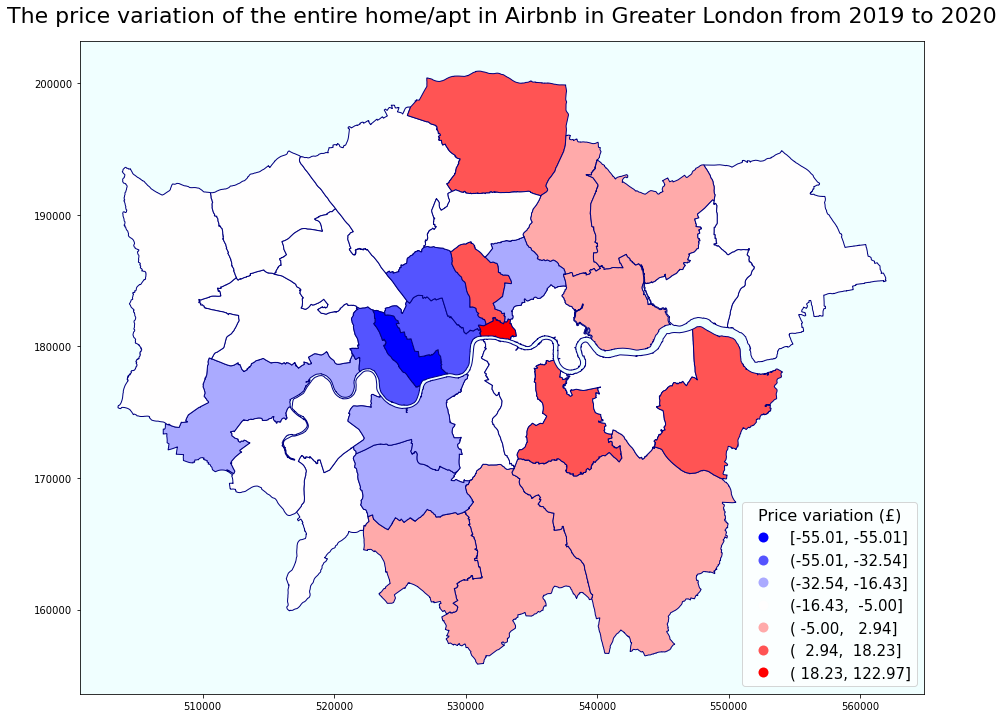

In [24]:
Entire_home_number_2019 = df_2019[df_2019.room_type == 'Entire home/apt']
Entire_home_number_2020 = df_2020[df_2020.room_type == 'Entire home/apt']

Entire_home_number_neighbourhood_2019 = Entire_home_number_2019.groupby(['neighbourhood'])
Entire_home_number_neighbourhood_2020 = Entire_home_number_2020.groupby(['neighbourhood'])

Entire_home_price_neighbourhood_2019 = Entire_home_number_neighbourhood_2019.price.mean().reset_index(name="price")
Entire_home_price_neighbourhood_2020 = Entire_home_number_neighbourhood_2020.price.mean().reset_index(name="price")


diff_price_2019_to_2020 = pd.merge(Entire_home_price_neighbourhood_2019, Entire_home_price_neighbourhood_2020, how = 'left', on='neighbourhood')
diff_price_2019_to_2020['diff'] = diff_price_2019_to_2020['price_y'] - diff_price_2019_to_2020['price_x']

print('neighbourhood: Borough names\ncount_x: Mean price of entire home/apt in 2019\ncount_y: Mean price of entire home/apt in 2020\ndiff: Price variation (£)\n')
print(diff_price_2019_to_2020)


London_map = gpd.read_file('https://github.com/VON-N1NE/i2p/raw/main/Data/Boroughs.gpkg')

join_data_neighbourhood_Entire_home = London_map.set_index('NAME').join(diff_price_2019_to_2020.set_index('neighbourhood'))
join_data_neighbourhood_Entire_home.head()


fig, ax = plt.subplots(1, figsize=(16, 12),facecolor='white')

ax.axis('on')
ax.set_title('The price variation of the entire home/apt in Airbnb in Greater London from 2019 to 2020', fontsize = 22,  y = 1.02)

ax = join_data_neighbourhood_Entire_home.plot(column='diff', ax=ax, legend=True, cmap='bwr', edgecolor='navy',legend_kwds={'loc': 'lower right' ,'fontsize':15}, scheme='NaturalBreaks', k=7)
ax.set_facecolor('azure')

legend = ax.get_legend()
legend.set_title('Price variation (£)')
legend.get_title().set_fontsize('16')

plt.savefig('Figure4.png', dpi=100)
plt.show()

neighbourhood: Borough names
price_x: Mean price of private room in 2019
price_y: Mean price of private room in 2020
diff: Price variation (£)

             neighbourhood     price_x    price_y       diff
0     Barking and Dagenham   41.605469  51.709677  10.104209
1                   Barnet   57.621711  52.454945  -5.166765
2                   Bexley   42.531429  41.648936  -0.882492
3                    Brent   58.285929  60.080944   1.795015
4                  Bromley   42.903226  52.420118   9.516893
5                   Camden   72.525737  71.385332  -1.140405
6           City of London  114.538462  80.260000 -34.278462
7                  Croydon   56.352396  40.030000 -16.322396
8                   Ealing   56.753637  61.253702   4.500065
9                  Enfield   41.854067  44.621005   2.766938
10               Greenwich   46.690367  47.806832   1.116465
11                 Hackney   50.017970  48.770328  -1.247643
12  Hammersmith and Fulham   72.496933  68.497664  -3.999269
13

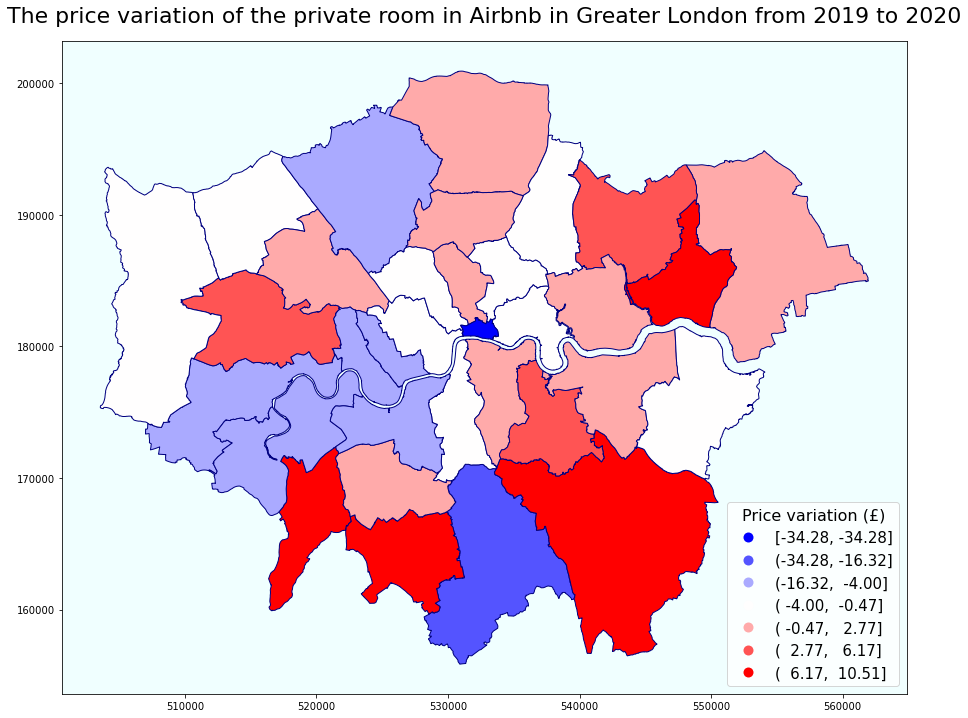

In [22]:
Private_room_number_2019 = df_2019[df_2019.room_type == 'Private room']
Private_room_number_2020 = df_2020[df_2020.room_type == 'Private room']

Private_room_number_neighbourhood_2019 = Private_room_number_2019.groupby(['neighbourhood'])
Private_room_number_neighbourhood_2020 = Private_room_number_2020.groupby(['neighbourhood'])

Private_room_price_neighbourhood_2019 = Private_room_number_neighbourhood_2019.price.mean().reset_index(name="price")
Private_room_price_neighbourhood_2020 = Private_room_number_neighbourhood_2020.price.mean().reset_index(name="price")




diff_price_private_2019_to_2020 = pd.merge(Private_room_price_neighbourhood_2019, Private_room_price_neighbourhood_2020, how = 'left', on='neighbourhood')
diff_price_private_2019_to_2020['diff'] = diff_price_private_2019_to_2020['price_y'] - diff_price_private_2019_to_2020['price_x']

print('neighbourhood: Borough names\nprice_x: Mean price of private room in 2019\nprice_y: Mean price of private room in 2020\ndiff: Price variation (£)\n')
print(diff_price_private_2019_to_2020)

London_map = gpd.read_file('https://github.com/VON-N1NE/i2p/raw/main/Data/Boroughs.gpkg')

join_data_neighbourhood_Private_room = London_map.set_index('NAME').join(diff_price_private_2019_to_2020.set_index('neighbourhood'))
join_data_neighbourhood_Private_room.head()


fig, ax = plt.subplots(1, figsize=(16, 12),facecolor='white')

ax.axis('on')
ax.set_title('The price variation of the private room in Airbnb in Greater London from 2019 to 2020', fontsize = 22,  y = 1.02)

ax = join_data_neighbourhood_Private_room.plot(column='diff', ax=ax, legend=True, cmap='bwr', edgecolor='navy',legend_kwds={'loc': 'lower right' ,'fontsize':15}, scheme='NaturalBreaks', k=7)
ax.set_facecolor('azure')

legend = ax.get_legend()
legend.set_title('Price variation (£)')
legend.get_title().set_fontsize('16')

plt.savefig('Figure5.png', dpi=100)
plt.show()

## 4 Executive Briefing

### 4.1 Overview

The outbreak of COVID-19 hit the world at the end of 2019, and it caused a lot of damage to many industries. The tourism industry has also been hit severely in many places (Rogerson and Baum, 2020). Simultaneously, as a business relies on tourism, Airbnb suffered varying degrees of losses all over the world (Boros, Dudás and Kovalcsik, 2020). After the outbreak of COVID-19, Airbnb allows their guests to cancel the reservation for free and set up a $250 million relief fund to help their hosts to survive the crisis (Wisniewska, 2020). As a result, many guests canceled their traveling plans for safety concerns.

Based on this situation, the main purpose of this report is to explore the influence of COVID-19 on Airbnb in Greater London. The effects are analyzed from two aspects: the number and the price of different types of rooms in a different period. The data is from Inside Airbnb (Inside Airbnb, 2020). We use python to clean and process these data and create figures to show the variation in after the outbreak of COIVD-19 directly.

### 4.2 Effects on the number of rooms

First of all, we will analyze the variation in the number of rooms on Airbnb. There are 4 different types of rooms in Airbnb, which is entire home/apt, private room, shared room, and hotel room. We count these 4 types of rooms in 2019 and 2020. The results are demonstrated in Figure 1.

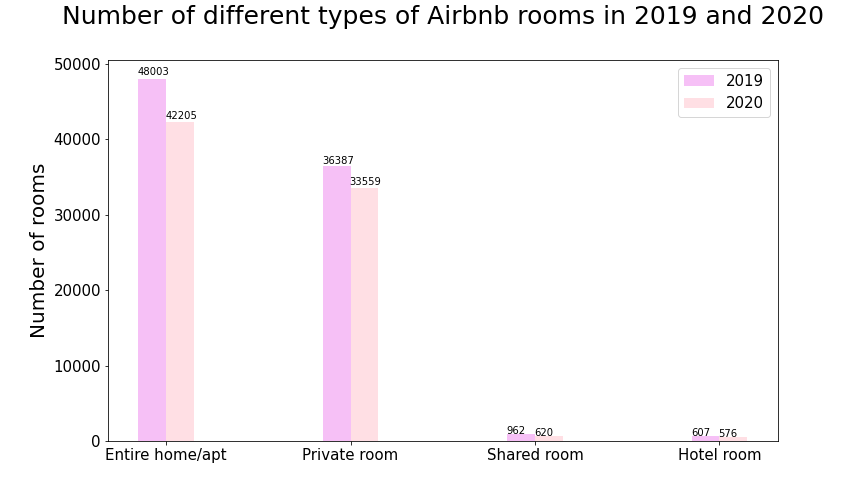

In [10]:
display(Image.open(path1))

From the figure, we can observe that the entire home/apt and private room almost occupy the whole quantity. The number of all these 4 types of rooms decreased from 2019 to 2020. The biggest variation in quantity is entire home/apt, which reduced 6000 rooms approximately. Simultaneously, the private room also decreased by about 3000 rooms. If we talk about the proportion, the shared room almost lost a third of the number of rooms in 2020. Since the shared room involved unavoidable contact with others, its decline is normal due to safety concerns. However, the falling part of the two largest types of rooms is not particularly large.

Secondly, we create a distribution map and a table to show the different variation rates of the number of rooms in different boroughs in Greater London.

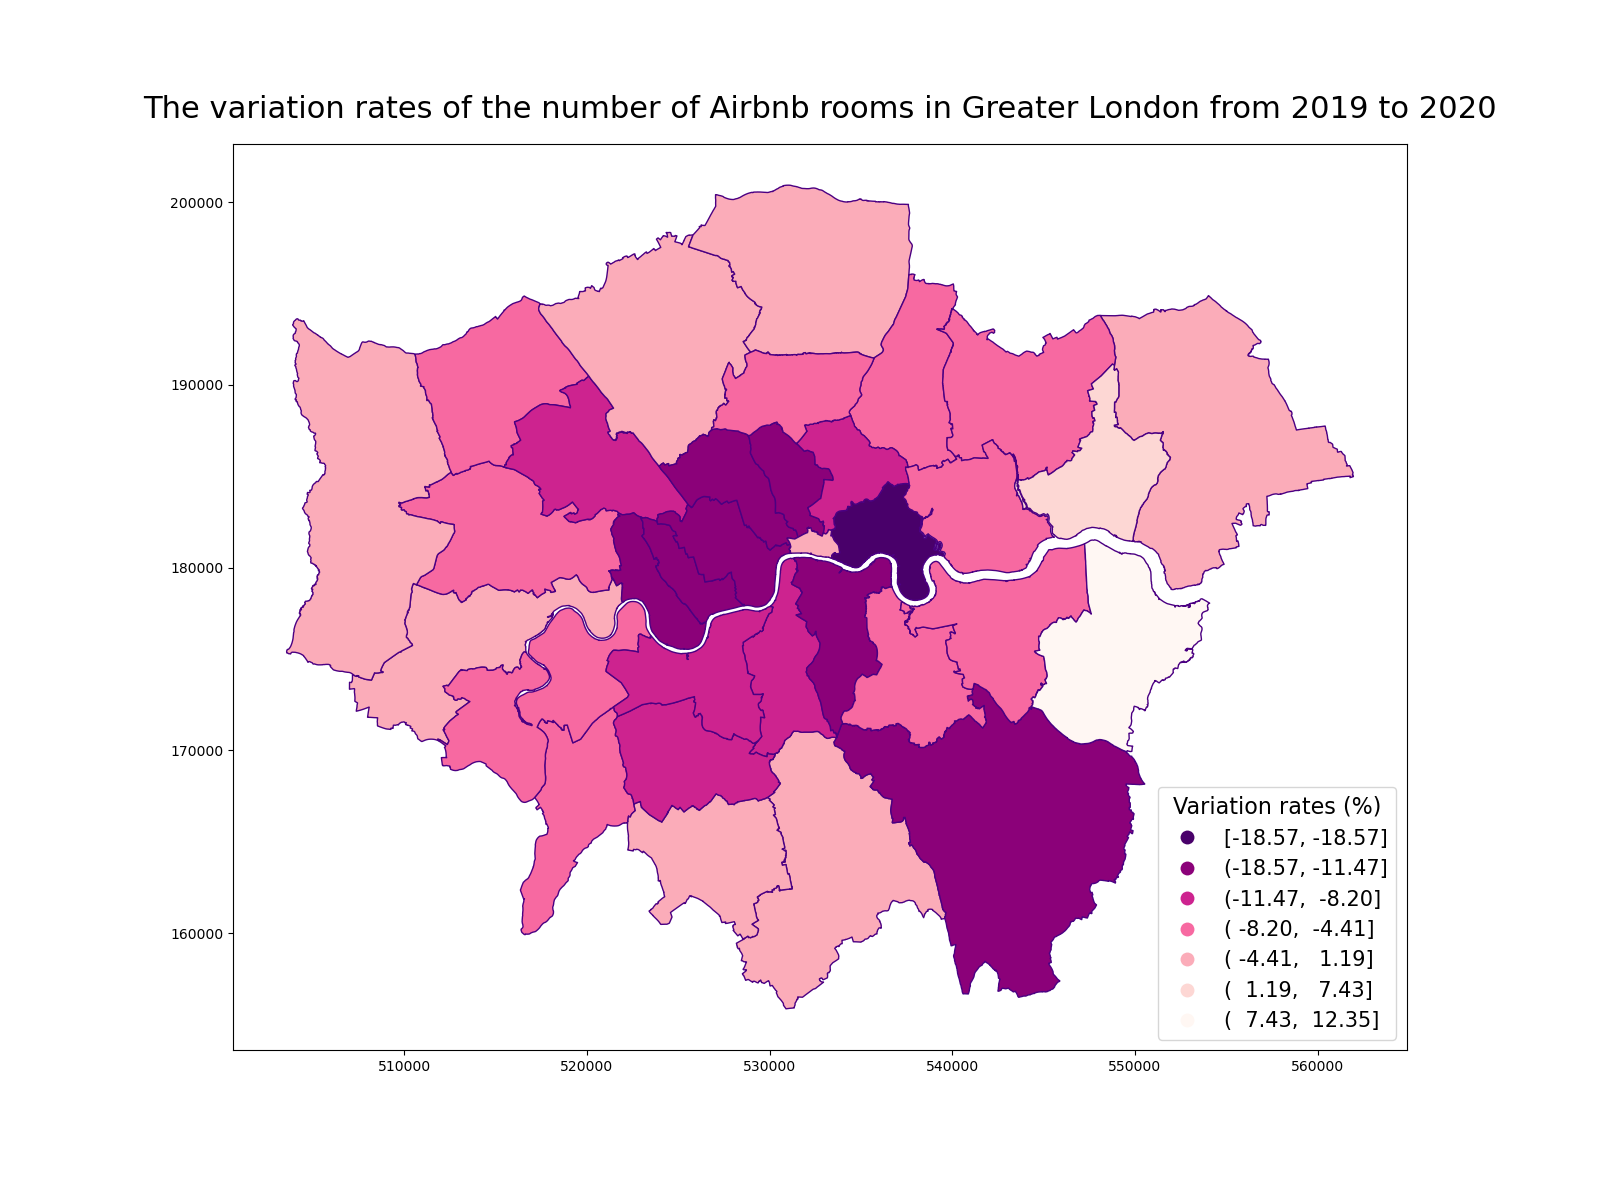

In [11]:
display(Image.open(path2))

In [19]:
print('neighbourhood: Borough names\nPrice_x: Number of rooms in 2019\nPrice_y: Number of rooms in 2020\ndiff: Variation rate (%)\n')
print(diff_2019_to_2020)

neighbourhood: Borough names
Price_x: Number of rooms in 2019
Price_y: Number of rooms in 2020
diff: Variation rate (%)

             neighbourhood  count_x  count_y       diff
0     Barking and Dagenham      377      405   7.427056
1                   Barnet     1672     1643  -1.734450
2                   Bexley      243      273  12.345679
3                    Brent     2594     2336  -9.946029
4                  Bromley      667      577 -13.493253
5                   Camden     6097     5257 -13.777268
6           City of London      455      449  -1.318681
7                  Croydon     1097     1110   1.185050
8                   Ealing     1802     1673  -7.158713
9                  Enfield      687      686  -0.145560
10               Greenwich     1682     1585  -5.766944
11                 Hackney     6324     5720  -9.550917
12  Hammersmith and Fulham     4204     3577 -14.914367
13                Haringey     2235     2119  -5.190157
14                  Harrow      481    

It can be observed that the most severely affected borough in Tower Hamlets. Its number of rooms has dropped by less than 20%. Other boroughs near the center like Islington, Camden, Westminster, also had a drop of about 10% except the City of London. In outer London, Bromley is more severely affected which is a popular tourism area. Interestingly, there are 3 boroughs’ rates of the number of rooms that have increased in 2020 under the threat of COVID-19. This may represent that the demand for short-term rental housing in Bexley, Barking and Dagenham stay remained or even boosted after the outbreak of COVID-19. One possibility is that the epidemic is not severe in these 3 boroughs. While the decline rates in other boroughs are around 10%, which are relatively small values. In general, the number of all types of rooms in most boroughs of Greater London are not affected too much except for Tower Hamlets.

### 4.3 Effects on the price of rooms

In this part, we will explore the influence of COVID-19 on the price of rooms in Airbnb during different periods. As we mentioned before, there are 4 types of rooms in Airbnb. However, the type of hotel room only started running in 2019. So, we do not have the data of hotel room from 2016 to 2018. Since we will explore how the price changed from 2016 to 2020, we do not consider the hotel room. We calculated the price of other 3 types of rooms and plot a line chart.

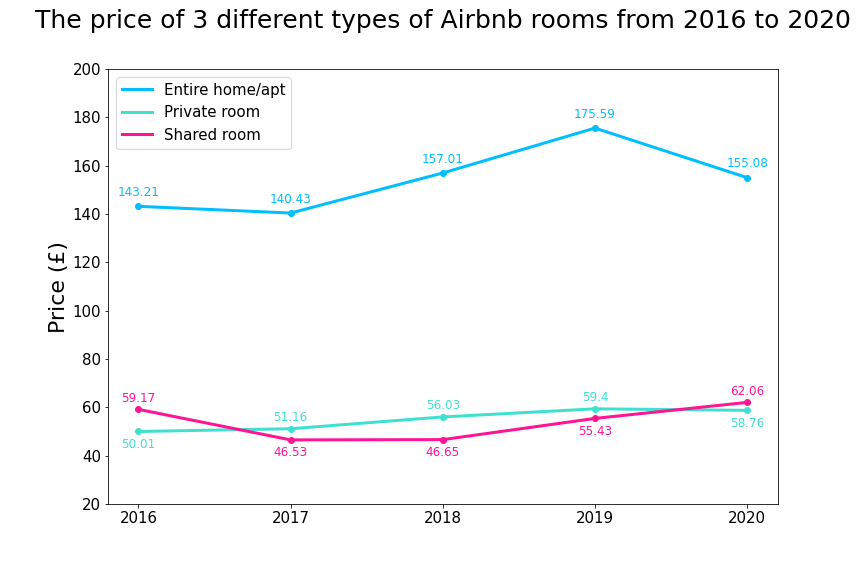

In [13]:
display(Image.open(path3))

The blue line stands for the entire home/apt and its price reached to its peak in 2019. In 2020, its price dropped and backed to the point in 2018 without particular huge fluctuations. We can assume that the blue line may still keep rising and the price in 2020 would exceed the highest point in 2019 without the impact of COVID-19. As for the private room and shared room, their trends of price are more stable than the entire home/apt. Their price in 2020 has increased slightly compared to 2016. So, we can say that the impact of COVID-19 on the price of entire home/apt is much greater than the price of private room and shared room.

Similarly, we create distribution maps and tables to demonstrate the price variation of different types of rooms from 2019 to 2020 in Greater London. Since the amount of shared rooms is too small to get a relatively accurate result, we discard it. 

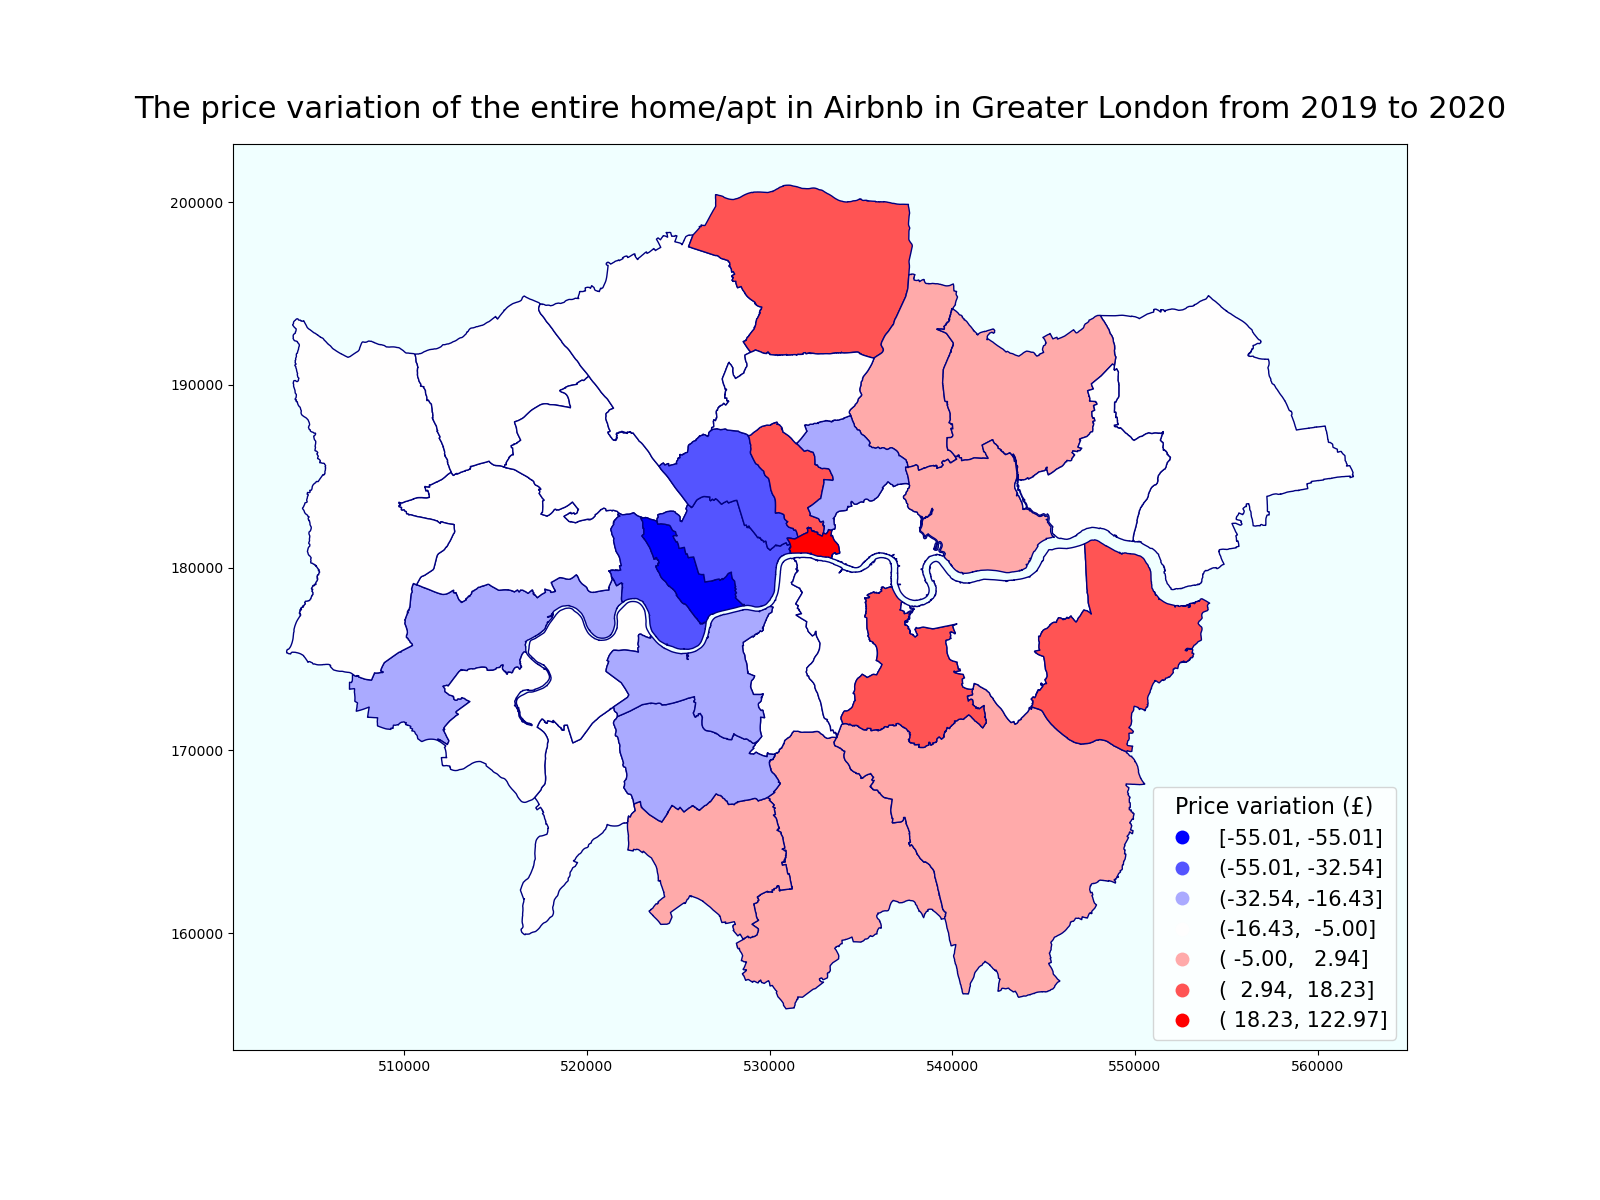

In [14]:
display(Image.open(path4))

In [20]:
print('neighbourhood: Borough names\ncount_x: Mean price of entire home/apt in 2019\ncount_y: Mean price of entire home/apt in 2020\ndiff: Price variation (£)\n')
print(diff_price_2019_to_2020)

neighbourhood: Borough names
count_x: Mean price of entire home/apt in 2019
count_y: Mean price of entire home/apt in 2020
diff: Price variation (£)

             neighbourhood     price_x     price_y        diff
0     Barking and Dagenham  103.530973   98.532787   -4.998187
1                   Barnet  130.350975  123.324088   -7.026887
2                   Bexley   90.967213  101.375000   10.407787
3                    Brent  140.392140  130.450945   -9.941195
4                  Bromley   97.312757   96.991379   -0.321378
5                   Camden  187.801113  151.174002  -36.627112
6           City of London  202.562500  325.534351  122.971851
7                  Croydon   90.393795   89.306533   -1.087262
8                   Ealing  134.416667  123.981308  -10.435358
9                  Enfield  105.760684  117.612613   11.851929
10               Greenwich  133.943038  123.955119   -9.987919
11                 Hackney  137.503478  118.166721  -19.336758
12  Hammersmith and Fulham  177

We can observe that the price of entire home/apt has increased hugely in the City of London, where its price has added by more than 100 pounds. Surprisingly, the price increased in 6 boroughs apart from the City of London. The price of entire home/apt in Islington added by 18 pounds which is the second largest growth, but still far from the growth in the City of London. While the growth in other 5 boroughs is relatively small. On the other hand, the remaining 26 boroughs’ price decreased during COVID-19 which is corresponds to the previous results in the line chart part. Thus, we can say that the growth in the City of London is significant. In some boroughs like Westminster or Kensington and Chelsea, the price decreased by more than 40 pounds.

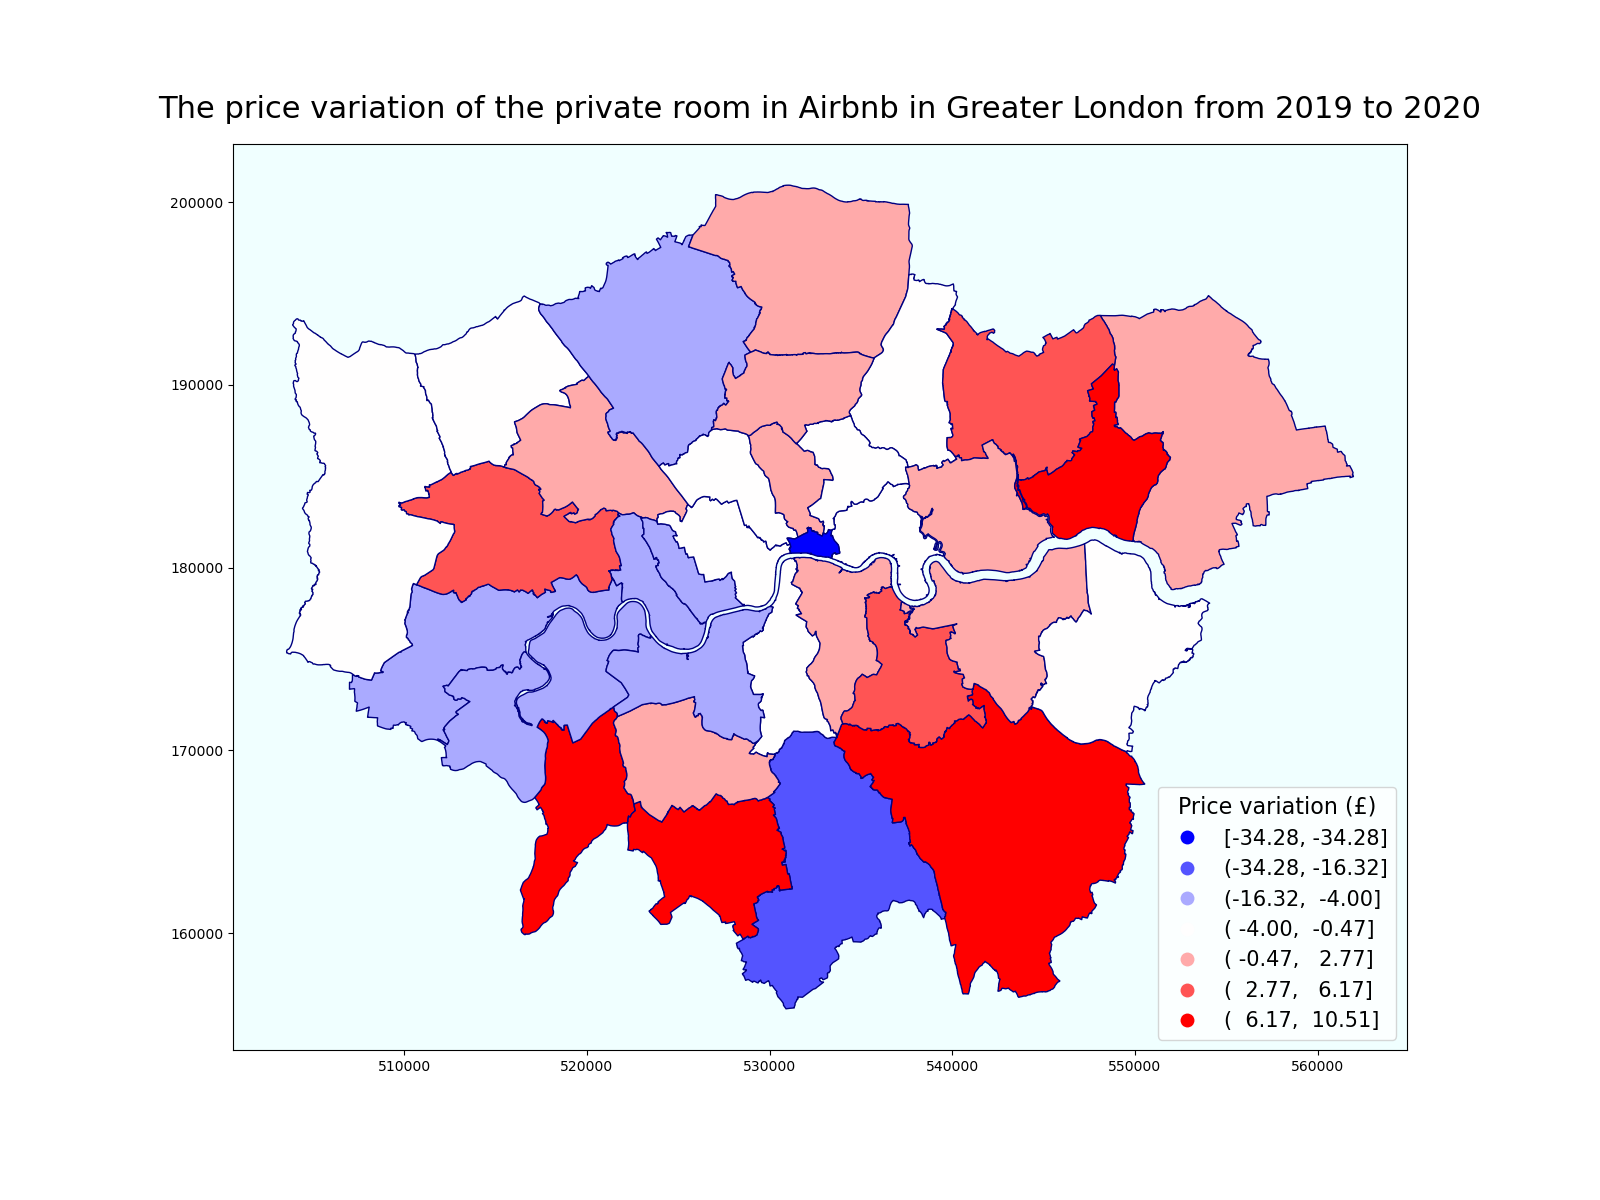

In [42]:
display(Image.open(path5))

In [21]:
print('neighbourhood: Borough names\nprice_x: Mean price of private room in 2019\nprice_y: Mean price of private room in 2020\ndiff: Price variation (£)\n')
print(diff_price_private_2019_to_2020)

neighbourhood: Borough names
price_x: Mean price of private room in 2019
price_y: Mean price of private room in 2020
diff: Price variation (£)

             neighbourhood     price_x    price_y       diff
0     Barking and Dagenham   41.605469  51.709677  10.104209
1                   Barnet   57.621711  52.454945  -5.166765
2                   Bexley   42.531429  41.648936  -0.882492
3                    Brent   58.285929  60.080944   1.795015
4                  Bromley   42.903226  52.420118   9.516893
5                   Camden   72.525737  71.385332  -1.140405
6           City of London  114.538462  80.260000 -34.278462
7                  Croydon   56.352396  40.030000 -16.322396
8                   Ealing   56.753637  61.253702   4.500065
9                  Enfield   41.854067  44.621005   2.766938
10               Greenwich   46.690367  47.806832   1.116465
11                 Hackney   50.017970  48.770328  -1.247643
12  Hammersmith and Fulham   72.496933  68.497664  -3.999269
13

As for the price of private room, the situation is similar to the entire home/apt. There still 4 boroughs’ prices increased by more than 5 pounds. The biggest growth is in Sutton which the price added by 10.5 pound. On the other hand, the price in remaining boroughs decreased little or basically unchanged except the City of London and Croydon that dropped by 34 and 16 pounds respectively. In general, the price of private room decreased slightly in most boroughs from 2019 to 2020.

### 4.4 Analysis

By comparing the number and the price of different types of rooms during a different period, we found that the drop in the number and the price in most boroughs are not too huge. Even more, they rose instead in some particular boroughs. Then, we can make some assumptions. The first is the effects of COVID-19 on Airbnb in Greater London is not as serious as in other big cities. We can observe from the figures that although the number of rooms decreased, it only occupies a small part. The second assumption is some hosts may still decide to put their properties in Airbnb even the amount of reservation is not as good as before. They just did not know how to deal with these empty rooms and keep their properties pages in Airbnb remained. And that will cause the accuracy of the data to fall.  
  
  According to (Calatayuda, 2020), another possibility is that some of the hosts put their rooms to the long-term rental housing instead. Another article also pointed out that a 45 percent growth in new long-term rental housing in central London compared with the same period last year (Wisniewska, 2020). At the same time, one research completed by Hamptons International, a famous estate agent chain, also figured out that some hosts deciding to move their short-term housings to the long-term rental market in London (ROZI JONES, 2020). The evidence made us believe that this is a reasonable answer for the decreasing of the number and the price of rooms in Airbnb.  
  
  On the other hand, explanations or assumptions are required for those boroughs with the opposite performance in the variation of the number and the price of rooms during the COVID-19 period. We guess one possibility is that the demand for short-term rentals recovered to some degree after several months. Actually, since many hosts letting the guest use contactless check-in that without face-to-face contact and disinfecting the room completely after the guests leaving, the security is guaranteed during Airbnb service. Additionally, some hosts can still receiving reservations because the properties they offered are close to medical resources like hospitals that may be suitable for front-line personnel (Wisniewska, 2020). These might be the reason for the recovering demand for Airbnb.  
  
  As for the limitations, the number of reservations and transactions may reflect the influence of COVID-19 on Airbnb to some extent. However, such data are not applied in this report. We believe the results can be more clearly by analyzing the data of reservations from 2019 to 2020. Secondly, we do not refer to other housing price trends or those similar alternatives to customers, for instance, the room price in hotel.

### 4.5 Conclusion

As for the limitations, the number of reservations and transactions may reflect the influence of COVID-19 on Airbnb to some extent. However, such data are not applied in this report. We believe the results can be more clearly by analyzing the data of reservations from 2019 to 2020. Secondly, we do not refer to other housing price trends or those similar alternatives to customers, for instance, the room price in hotel.

## 5 Reference

Boros, L., Dudás, G. and Kovalcsik, T. (2020) ‘The effects of COVID-19 on Airbnb’, Hungarian Geographical Bulletin, 69(4), pp. 363–381. doi: 10.15201/hungeobull.69.4.3.  
alatayuda, J. M. (2020) Airbnb flats become long-term rentals in coronavirus fix, EU Observer. Available at: https://euobserver.com/coronavirus/148035 (Accessed: 9 January 2021).  
Dolnicar, S. and Zare, S. (2020) ‘COVID19 and Airbnb – Disrupting the Disruptor’, Annals of Tourism Research, 83, p. 102961. doi: 10.1016/j.annals.2020.102961.  
Inside Airbnb (2020) Get the Data - Inside Airbnb. Adding data to the debate, Inside Airbnb. Available at: http://insideairbnb.com/get-the-data.html (Accessed: 9 January 2021)  
Rogerson, C. M. and Baum, T. (2020) ‘COVID-19 and African tourism research agendas’, Development Southern Africa, 37(5), pp. 727–741. doi: 10.1080/0376835X.2020.1818551.  
ROZI JONES (2020) London landlords offering short let properties for long-term occupation | Property Reporter. Available at: https://www.propertyreporter.co.uk/property/ondon-landlords-offering-short-let-properties-for-long-term-occupation.html (Accessed: 10 January 2021).  
Wisniewska, A. (2020) How Airbnb hosts are fighting back against Covid-19 fallout | Financial Times. Available at: https://www.ft.com/content/9d092b78-7045-11ea-89df-41bea055720b (Accessed: 10 January 2021).